1)  Um  pesquisador  médico  quer  saber  como  a  dosagem  de  um  novo  medicamento  afeta  a
presença de bactérias em adultos. Para isso, ele realiza um experimento com 60 pacientes e 6
níveis diferentes de dosagem. Ele quer saber a contagem bacteriana (um indicador normalizado,
obtido após a cultura de material biológico retirado de cada paciente) para cada dosagem após
48 horas de administração do medicamento.  
Além  deste  teste  de  dosagem,  o  pesquisador  suspeita  que  o  sexo  de  cada  paciente  poderia
afetar o resultado. Para avaliar este efeito, o pesquisador planeja o experimento de tal forma
que o efeito do sexo poderia ser avaliado posteriormente. Para isso, dos 60 pacientes testados,
30 eram homens e 30 mulheres.
Analise os dados da planilha Green_Belt_FM2S_Lista_Exercícios_03_e_04, na aba
01.Teste_Medicamento.



| Coluna da Worksheet     | Descrição                                                                                                   |
|-------------------------|-------------------------------------------------------------------------------------------------------------|
| Paciente                | O paciente que recebeu o ensaio.                                                                            |
| Dose (mg/kg)            | A dosagem do medicamento administrado aos pacientes. Existem seis níveis de dosagem: 0,5; 1,0; 1,5; 2,0; 2,5; e 3,0. |
| Contagem de bactérias   | O valor para um exame de contagem de bactérias (normalizado).                                                |
| Sexo                    | Masculino ou feminino                                                                                       |

Responda:
1. A dosagem influencia na contagem final? Avalie com o gráfico mais apropriado.
2. O sexo tem correlação com a contagem? Estratifique a sua análise.
3. O medicamento se mostrou eficaz? Qual é a melhor dosagem para o tratamento?

In [3]:
import pandas as pd

In [1]:
url = 'https://github.com/moises-rb/Analise_Dados/blob/main/Green_Belt/3-Analyse/Exercicios/Lista_3/base_dados/%5BFM2S%5D%20Lista_Exerc%C3%ADcios_%203%20e%204.xlsx?raw=True'

In [11]:
pd.ExcelFile(url).sheet_names

['1.Teste_Medicamento', '2.Construtora', '3.Condicionamento_Físico']

In [14]:
dados_medicamento = pd.read_excel(url, sheet_name=0) #pd.read_excel(url, sheet_name='1.Teste_Medicamento')

In [15]:
# Visualização inicial dos dados
print(dados_medicamento.head())
print(dados_medicamento.info())
print(dados_medicamento.describe())

   Paciente  Dose (mg/kg)  Contagem Sexo
0         1           0.5        95    M
1         2           0.5        90    M
2         3           0.5        99    M
3         4           0.5        92    M
4         5           0.5        85    M
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Paciente      60 non-null     int64  
 1   Dose (mg/kg)  60 non-null     float64
 2   Contagem      60 non-null     int64  
 3   Sexo          60 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB
None
        Paciente  Dose (mg/kg)   Contagem
count  60.000000     60.000000  60.000000
mean   30.500000      1.750000  72.966667
std    17.464249      0.861119  13.739670
min     1.000000      0.500000  40.000000
25%    15.750000      1.000000  64.250000
50%    30.500000      1.750000  73.000000
75%    45.250000      2.500000  8

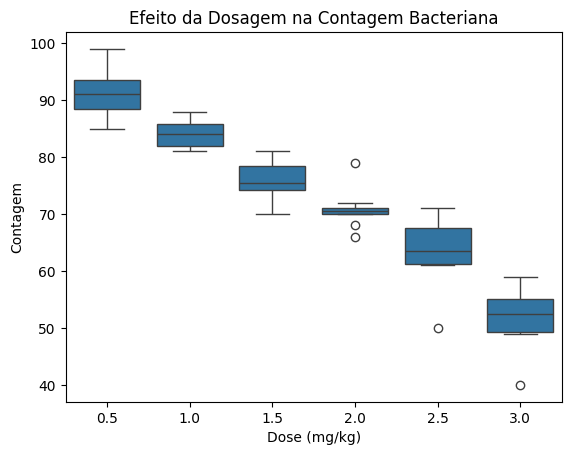

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Dose (mg/kg)", y="Contagem", data=dados_medicamento)
plt.xlabel("Dose (mg/kg)")
plt.ylabel("Contagem")
plt.title("Efeito da Dosagem na Contagem Bacteriana")
plt.show()

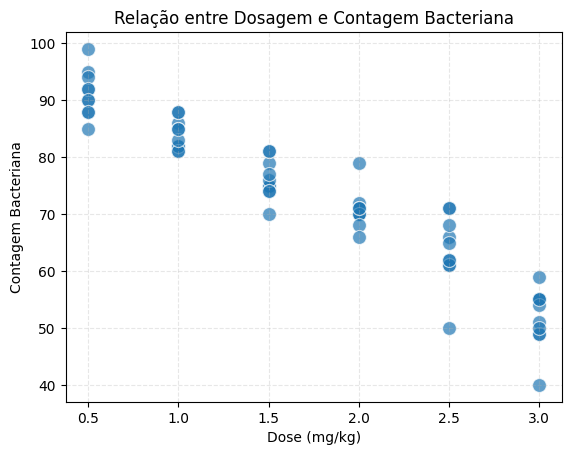

In [24]:
sns.scatterplot(
    x="Dose (mg/kg)",
    y="Contagem",
    data=dados_medicamento,
    alpha=0.7,
    s=100
)
plt.title("Relação entre Dosagem e Contagem Bacteriana")
plt.xlabel("Dose (mg/kg)")
plt.ylabel("Contagem Bacteriana")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [18]:
from scipy.stats import f_oneway

# Separar contagens por dose
grupos = [dados_medicamento[dados_medicamento["Dose (mg/kg)"] == dose]["Contagem"] for dose in dados_medicamento["Dose (mg/kg)"].unique()]
f_oneway(*grupos)  # Se p-valor < 0.05, há diferença significativa.

F_onewayResult(statistic=np.float64(108.96272401433694), pvalue=np.float64(6.044267231326593e-27))

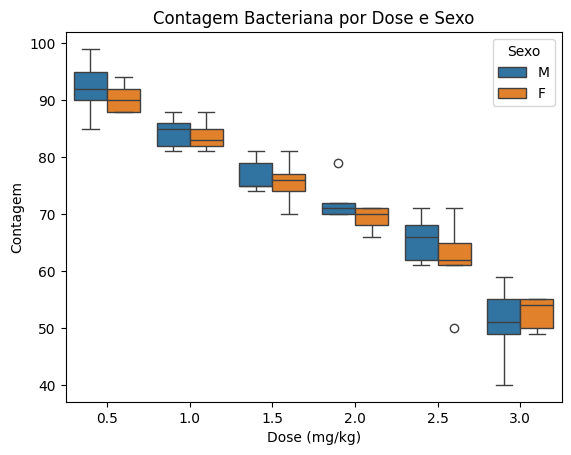

In [19]:
sns.boxplot(x="Dose (mg/kg)", y="Contagem", hue="Sexo", data=dados_medicamento)
plt.title("Contagem Bacteriana por Dose e Sexo")
plt.show()

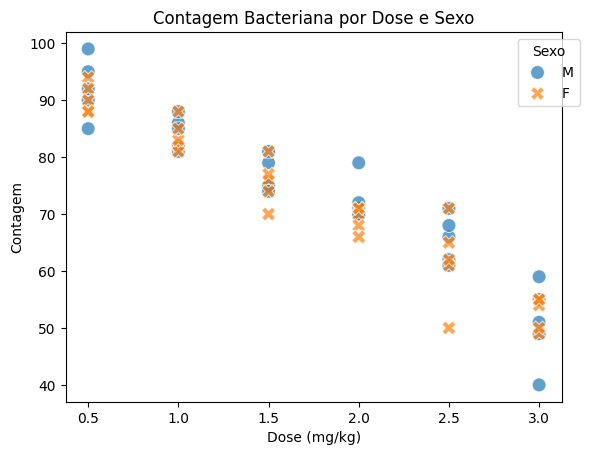

In [25]:
sns.scatterplot(
    x="Dose (mg/kg)",
    y="Contagem",
    hue="Sexo",      # Cores por sexo
    style="Sexo",    # Marcadores diferentes (opcional)
    data=dados_medicamento,
    alpha=0.7,
    s=100
)
plt.title("Contagem Bacteriana por Dose e Sexo")
plt.legend(title="Sexo", bbox_to_anchor=(1.05, 1))  # Legenda fora do gráfico
plt.show()

In [20]:
from scipy.stats import ttest_ind

homens = dados_medicamento[dados_medicamento["Sexo"] == "M"]["Contagem"]
mulheres = dados_medicamento[dados_medicamento["Sexo"] == "F"]["Contagem"]
ttest_ind(homens, mulheres)  # Se p-valor < 0.05, há diferença.

TtestResult(statistic=np.float64(0.4105052644490071), pvalue=np.float64(0.6829479226289563), df=np.float64(58.0))

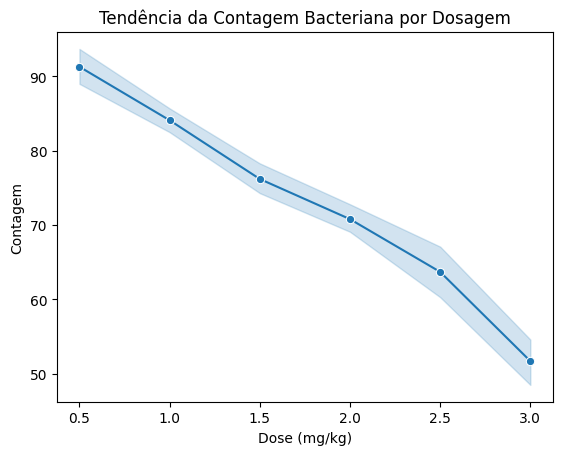

In [23]:
sns.lineplot(x="Dose (mg/kg)", y="Contagem", data=dados_medicamento, errorbar=('ci', 95), marker="o")
plt.title("Tendência da Contagem Bacteriana por Dosagem")
plt.show()

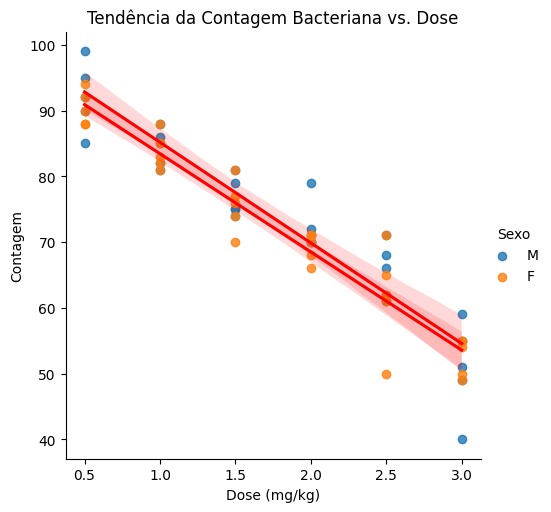

In [28]:
sns.lmplot(
    x="Dose (mg/kg)",
    y="Contagem",
    data=dados_medicamento,
    line_kws={'color': 'red'},  # Linha vermelha para a tendência
    hue="Sexo",      # Opcional: linhas separadas por sexo
    ci=95            # Intervalo de confiança
)
plt.title("Tendência da Contagem Bacteriana vs. Dose")
plt.show()

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(dados_medicamento["Contagem"], dados_medicamento["Dose (mg/kg)"], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   0.5    1.0     -7.2 0.0058 -12.8984  -1.5016   True
   0.5    1.5    -15.1    0.0 -20.7984  -9.4016   True
   0.5    2.0    -20.5    0.0 -26.1984 -14.8016   True
   0.5    2.5    -27.6    0.0 -33.2984 -21.9016   True
   0.5    3.0    -39.6    0.0 -45.2984 -33.9016   True
   1.0    1.5     -7.9 0.0019 -13.5984  -2.2016   True
   1.0    2.0    -13.3    0.0 -18.9984  -7.6016   True
   1.0    2.5    -20.4    0.0 -26.0984 -14.7016   True
   1.0    3.0    -32.4    0.0 -38.0984 -26.7016   True
   1.5    2.0     -5.4 0.0728 -11.0984   0.2984  False
   1.5    2.5    -12.5    0.0 -18.1984  -6.8016   True
   1.5    3.0    -24.5    0.0 -30.1984 -18.8016   True
   2.0    2.5     -7.1 0.0068 -12.7984  -1.4016   True
   2.0    3.0    -19.1    0.0 -24.7984 -13.4016   True
   2.5    3.0    -12.0    0.0 -17.6984  -6.3016   True
----------